In [8]:
#This script loads multiple CSV files of YouTube trending videos data from various countries,
#handles potential encoding issues, and appends a country identifier to each dataset.
#The final result is a list of dataframes, each containing data from a specific country with an additional "country" column.
#https://www.kaggle.com/datasets/datasnaek/youtube-new

In [9]:
import pandas as pd
import os

# List of YouTube CSV file paths and their respective country codes
csv_urls = [
    (r'H:\data analyticts\portfolio\youtube\USvideos.csv', 'US'),
    (r'H:\data analyticts\portfolio\youtube\RUvideos.csv', 'RU'),
    (r'H:\data analyticts\portfolio\youtube\MXvideos.csv', 'MX'),
    (r'H:\data analyticts\portfolio\youtube\KRvideos.csv', 'KR'),
    (r'H:\data analyticts\portfolio\youtube\JPvideos.csv', 'JP'),
    (r'H:\data analyticts\portfolio\youtube\INvideos.csv', 'IN'),
    (r'H:\data analyticts\portfolio\youtube\GBvideos.csv', 'GB'),
    (r'H:\data analyticts\portfolio\youtube\FRvideos.csv', 'FR'),
    (r'H:\data analyticts\portfolio\youtube\DEvideos.csv', 'DE'),
    (r'H:\data analyticts\portfolio\youtube\CAvideos.csv', 'CA')
]

# Function to load CSV and handle encoding errors
def load_csv_with_fallback(filepath):
    try:
        return pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(filepath, encoding='ISO-8859-1')

# Load all dataframes and assign corresponding country codes
all_dataframes = [load_csv_with_fallback(csv).assign(country=country) for csv, country in csv_urls]

# Example: Display the head of the first dataframe
all_dataframes[0].head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [10]:
# This code processes multiple YouTube trending video datasets by converting columns to appropriate data types,
# including dates, strings, and categorical variables.
# It ensures the dataset is clean and ready for further analysis or visualization, handling any conversion errors efficiently.

In [11]:
# Function to process each dataframe in all_dataframes
def process_dataframe(df):
    # Ensure certain columns are converted to strings
    str_columns = ['video_id', 'title', 'channel_title', 'category_id', 'tags', 'thumbnail_link', 'description']
    df[str_columns] = df[str_columns].astype(str)
    
    # Trending date transformation
    df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
    
    # Comments, ratings, and video error columns as categorical
    bool_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
    df[bool_columns] = df[bool_columns].astype('category')

    # Convert publish_time to datetime
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

    return df

# Apply the processing function to each dataframe
all_dataframes = [process_dataframe(df) for df in all_dataframes]

# Example: Display the head of the first processed dataframe
all_dataframes[0].head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [ ]:
# This code processes YouTube trending video datasets by adjusting the date and time columns, managing null values,
# and efficiently combining the data from different countries. It also removes duplicate video entries,
# retaining the first occurrence, and generates a value count for the 'category_id' field to understand the distribution of video categories.

In [12]:
# Insert 'publish_date' column and adjust 'publish_time'
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date)  # Insert 'publish_date'
    df['publish_time'] = df['publish_time'].dt.time            # Keep only time in 'publish_time'
    df['publish_date'] = pd.to_datetime(df['publish_date'], format="%Y-%m-%d")  # Convert to datetime

# Set 'video_id' as the index for all dataframes
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

# Check for null values across all dataframes
for i, df in enumerate(all_dataframes):
    print(f"Null values in dataframe {i}:")
    print(df.isnull().sum())

# Combine all dataframes into one
combined_df = pd.concat(all_dataframes)

# Create backup of combined_df
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

# Drop duplicates from combined_df based on 'video_id', keeping the first occurrence
combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False)\
                         .drop_duplicates('video_id', keep='first').set_index('video_id')

# Sort individual dataframes again (if needed)
for i, df in enumerate(all_dataframes):
    all_dataframes[i] = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')



Null values in dataframe 0:
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
dtype: int64
Null values in dataframe 1:
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country

In [13]:
# Get value counts for 'category_id' in the combined dataframe
category_counts = combined_df['category_id'].value_counts()
print(category_counts)


category_id
24    52916
22    33255
25    22183
17    13543
23    10729
10    10528
26     9744
1      9230
20     5582
27     4085
28     3469
2      3409
15     2330
29     1984
19      849
43      436
30       12
44        3
Name: count, dtype: int64


In [ ]:
# This script reads a JSON file containing YouTube video category metadata and maps the category IDs in the main dataset to human-readable category titles.
# The category titles are then added to both the combined dataframe and individual country-specific dataframes.
# This allows for a more interpretable analysis of video categories across different datasets.

In [14]:
import json

# File path to the JSON file containing category information
filepath = r'H:\data analyticts\portfolio\youtube\IN_category_id.json'

# Load category data from the JSON file
with open(filepath, 'r') as f:
    category_data = json.load(f)

# Extract category_id and category titles into a dictionary
category_id = {item['id']: item['snippet']['title'] for item in category_data['items']}

# Insert the 'category' column into the combined dataframe and backup dataframe
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))

# Insert the 'category' column into each individual dataframe in all_dataframes
for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))

# Printing the first 3 rows of the cleaned combined dataframe
print(combined_df.head(3))


            trending_date                                       title  \
video_id                                                                
POTgw38-m58    2018-06-14            【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班   
SPYzQplG_YI    2018-06-14  Freddie Gets A Bedroom Makeover • Ladylike   
ZFwylDNpgFc    2018-06-14    Anthem Official Cinematic Trailer (2018)   

                   category channel_title publish_date category_id  \
video_id                                                             
POTgw38-m58   Entertainment      我愛小明星大跟班   2018-06-13          24   
SPYzQplG_YI  People & Blogs      Ladylike   2018-06-09          22   
ZFwylDNpgFc          Gaming   Anthem Game   2018-06-09          20   

            publish_time                                               tags  \
video_id                                                                      
POTgw38-m58     16:00:03  吳宗憲|"吳姍儒"|"小明星大跟班"|"Sandy"|"Jacky wu"|"憲哥"|"中天...   
SPYzQplG_YI     18:00:01  Buzzfeed|"Ladylike"|

In [ ]:
#This script calculates the ratio of likes to dislikes for each video category in the YouTube trending dataset. 
# It handles cases of zero dislikes to avoid division errors and visualizes the result using a bar plot to showcase which categories receive the highest likes-to-dislikes ratio, 
# indicating the most positively received content categories.

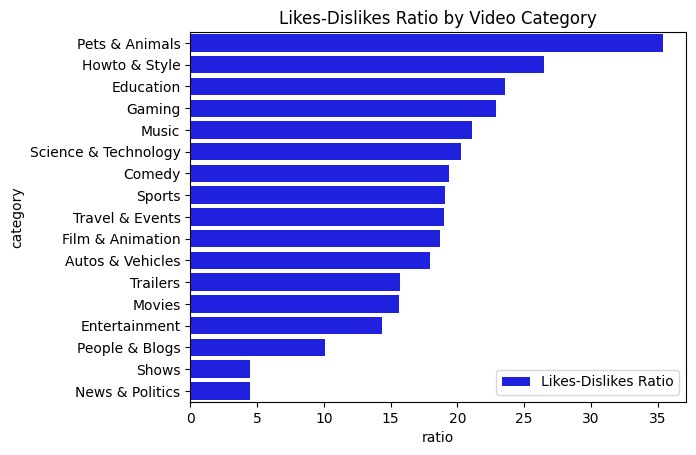

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total likes and dislikes by category
likesdf = combined_df.groupby('category')['likes'].sum()
dislikesdf = combined_df.groupby('category')['dislikes'].sum()

# Avoid division by zero by replacing 0 dislikes with NaN (which can later be handled)
ratiodf = (likesdf / dislikesdf.replace(0, pd.NA)).sort_values(ascending=False).reset_index()

# Rename the column for clarity
ratiodf.columns = ['category', 'ratio']

# Plot the ratio of likes to dislikes using Seaborn's barplot
sns.barplot(x="ratio", y="category", data=ratiodf, label="Likes-Dislikes Ratio", color="b")
plt.title('Likes-Dislikes Ratio by Video Category')
plt.show()


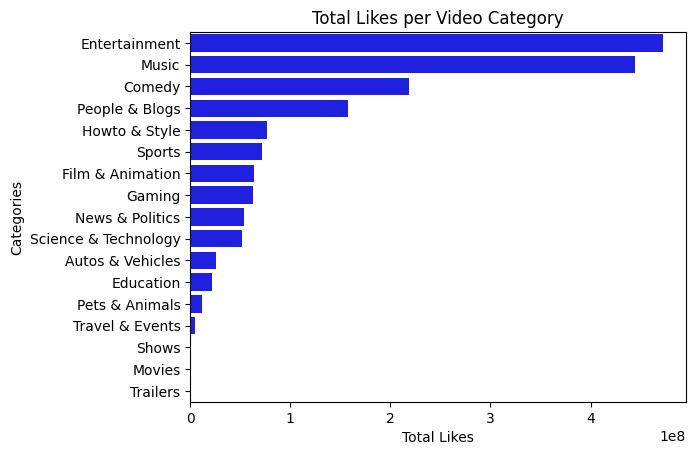

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert likes data to a DataFrame and sort by the number of likes
fdf = pd.DataFrame(likesdf).reset_index().sort_values('likes', ascending=False)

# Create a bar plot for the likes per category
sns.barplot(x='likes', y='category', data=fdf, color="b")

# Add labels and title for clarity
plt.xlabel("Total Likes")
plt.ylabel("Categories")
plt.title("Total Likes per Video Category")
plt.show()


In [ ]:
# This script generates bar plots visualizing the distribution of video categories for trending YouTube videos across different countries. 
# It applies a consistent color scheme across all plots, ensuring that each category is represented by the same color, allowing for easy comparison between countries.

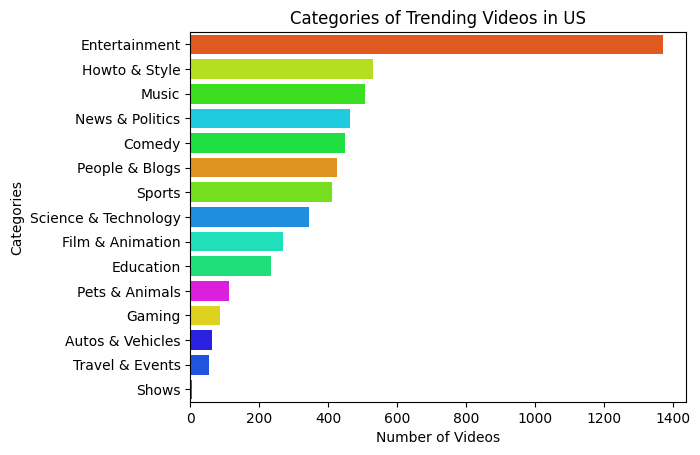

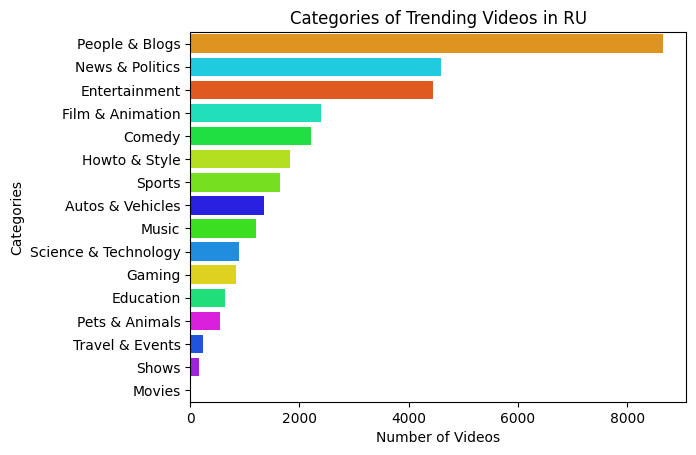

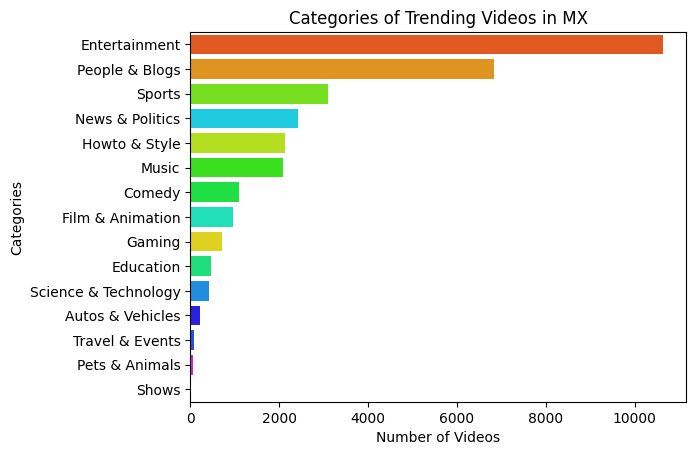

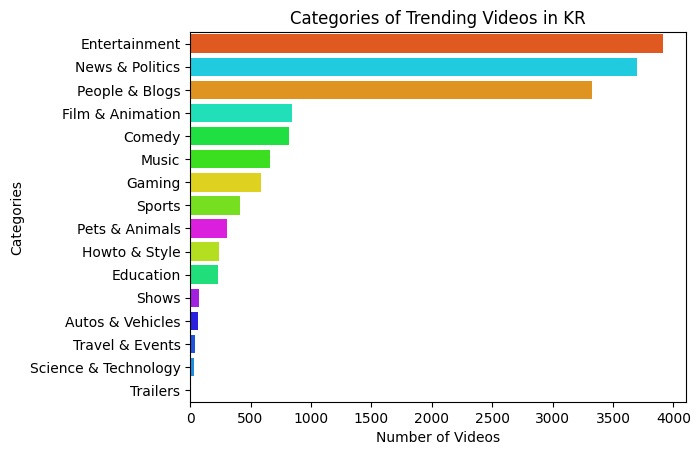

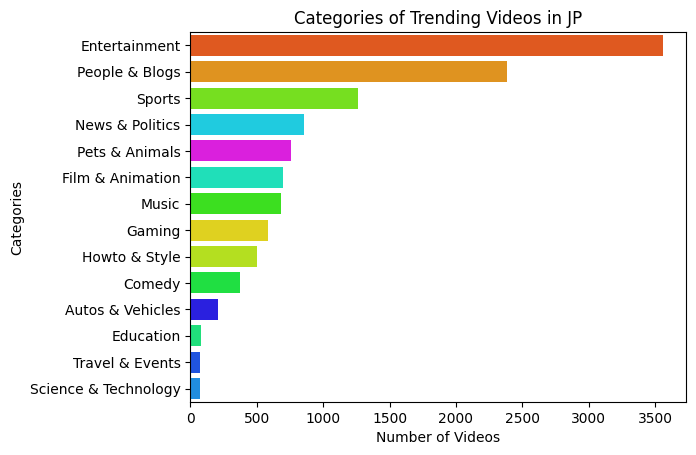

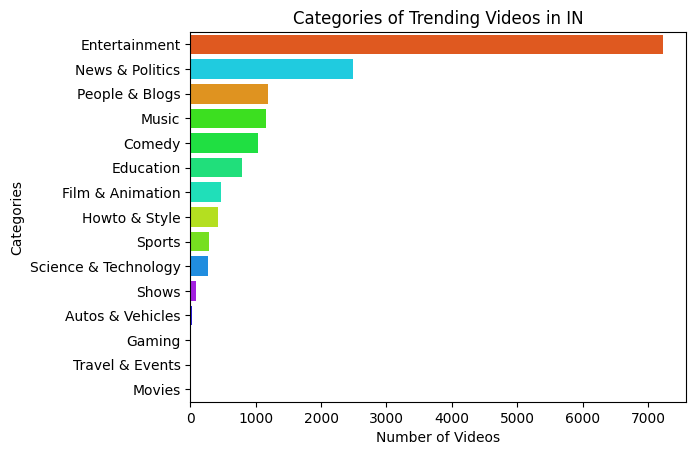

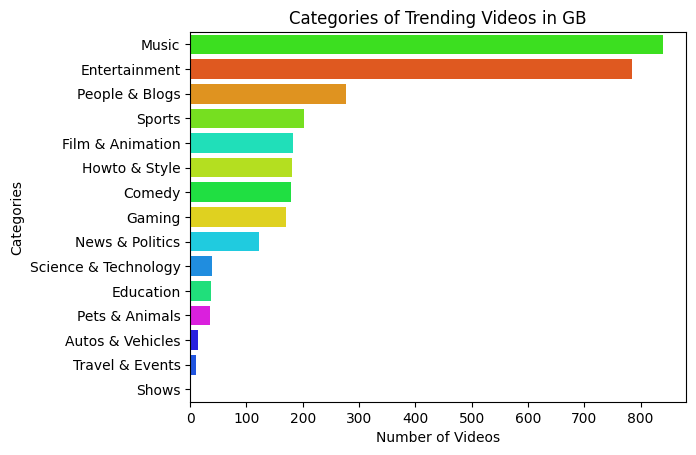

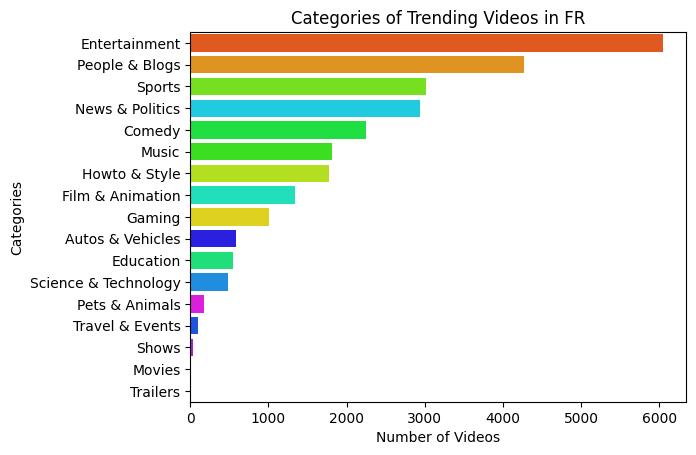

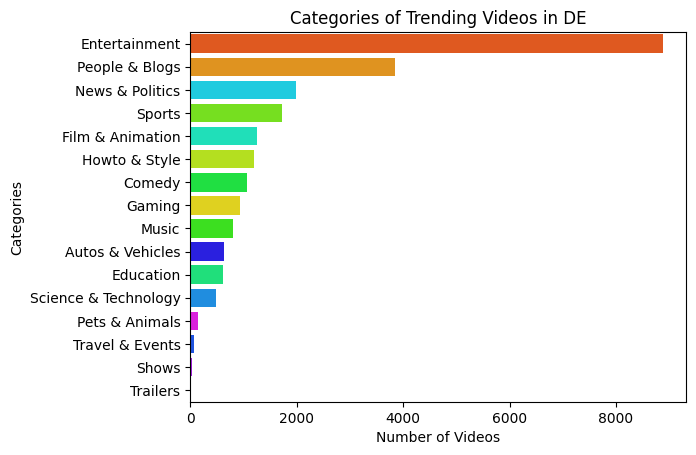

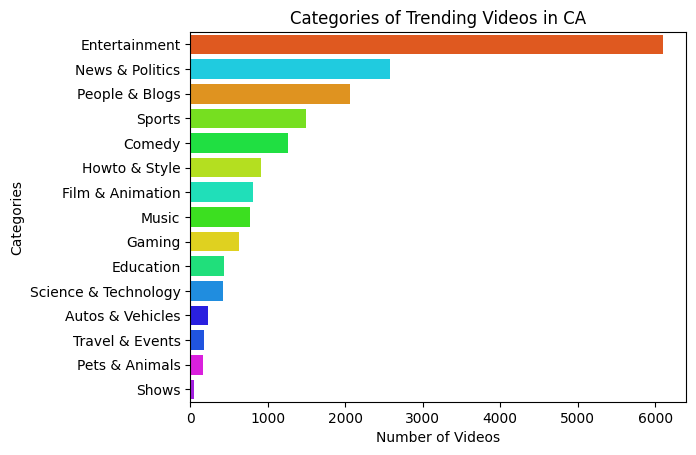

<Figure size 640x480 with 0 Axes>

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique categories across all countries to maintain consistent coloring
all_categories = combined_df['category'].unique()
rainbow_palette = sns.color_palette("hsv", len(all_categories))

# Map category names to a consistent color across countries
category_palette = dict(zip(all_categories, rainbow_palette))

countries=[]
for csv, country in csv_urls:
    countries.append(country)

# Loop through each country and generate the bar plot
for country in countries:
    tempdf = combined_df[combined_df['country'] == country]['category'].value_counts().reset_index()
    tempdf.columns = ['category', 'count']
    
    # Create the bar plot with a consistent color palette
    sns.barplot(y='category', x='count', data=tempdf, orient='h',hue='category', legend=False, palette=category_palette)
    
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title(f"Categories of Trending Videos in {country}")
    
    # Show the plot
    plt.show()

    # Clear the current plot to avoid overlapping figures
    plt.clf()


In [33]:
# Store results for top 5 trending videos (by views) in each country
top_trending_videos = []

for df in all_dataframes:
    temp = df.reset_index().sort_values(by='views', ascending=False)  # Sort by views
    temp.drop_duplicates(subset='video_id', keep='first', inplace=True)  # Drop duplicate videos
    temp.set_index('video_id', inplace=True)  # Set video_id as index
    top_trending_videos.append(temp.head(5))  # Select top 5 trending videos

# Example: results for the 4th country
top_trending_videos[3][['title', 'channel_title', 'category', 'views', 'likes', 'country']]




,title,channel_title,category,views,likes,country
video_id,,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223,KR
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,87450245,2584675,KR
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839,KR
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908,KR
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,49185287,1204868,KR


In [34]:
# Store results for top 5 most liked videos in each country
top_liked_videos = []

for df in all_dataframes:
    temp = df.reset_index().sort_values(by='likes', ascending=False)  # Sort by likes
    temp.drop_duplicates(subset='video_id', keep='first', inplace=True)  # Drop duplicate videos
    temp.set_index('video_id', inplace=True)  # Set video_id as index
    top_liked_videos.append(temp.head(5))  # Select top 5 most liked videos

# Example: results for the 1st country
top_liked_videos[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,123010920,5613827
VYOjWnS4cMY,225211923,5023450
ffxKSjUwKdU,148689896,3094021
FlsCjmMhFmw,149376127,3093544
kTlv5_Bs8aw,36857298,2729292


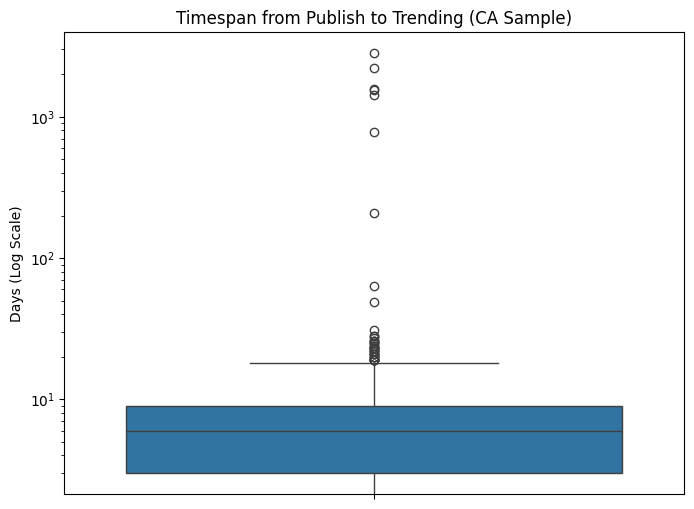

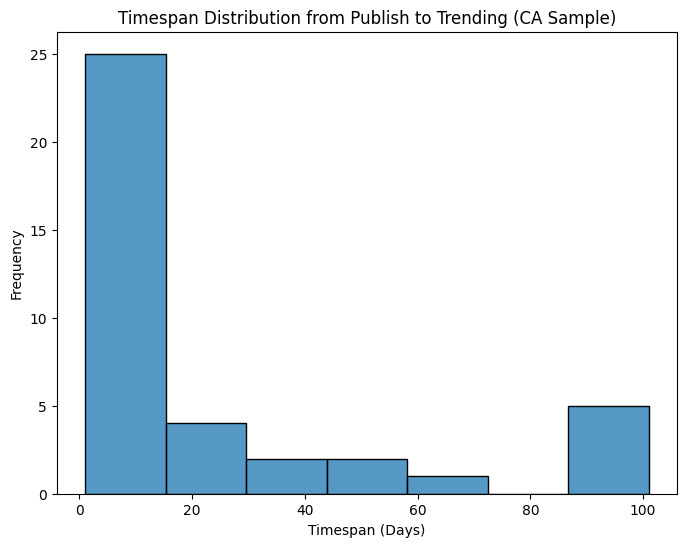

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate days between publish and trending date for each dataframe
for data in all_dataframes:
    data['timespan'] = (data['trending_date'] - data['publish_date']).dt.days

# Sampling 1000 rows from the first dataframe (CA) and finding the maximum timespan per video
to_trending = all_dataframes[0].sample(1000).groupby('video_id')['timespan'].max()

# Box plot with log scale for visualizing the timespan distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=to_trending)
plt.yscale("log")
plt.title('Timespan from Publish to Trending (CA Sample)')
plt.ylabel('Days (Log Scale)')
plt.show()

# Histogram showing the distribution of timespan counts with Rice binning
plt.figure(figsize=(8, 6))
sns.histplot(to_trending.value_counts(), bins='rice', kde=False)
plt.title('Timespan Distribution from Publish to Trending (CA Sample)')
plt.xlabel('Timespan (Days)')
plt.ylabel('Frequency')
plt.show()


In [39]:
# Group by category and sum 'views', 'likes', and 'comment_count', sorting by likes
top_likes = combined_df.groupby('category')[['views', 'likes']].sum().sort_values(by='likes', ascending=False).head()
print(top_likes)

                      views      likes
category                              
Entertainment   17587876009  471898570
Music           18175194049  444810340
Comedy           4573395853  218752103
People & Blogs   5606738071  157767478
Howto & Style    2215633743   77250730


In [40]:
# Group by category and sum 'views', 'likes', and 'comment_count', sorting by comments
top_comments = combined_df.groupby('category')[['views', 'likes', 'comment_count']].sum().sort_values(by='comment_count', ascending=False).head()
print(top_comments)

                       views      likes  comment_count
category                                              
Entertainment    17587876009  471898570       68372687
Music            18175194049  444810340       36231996
People & Blogs    5606738071  157767478       24662991
Comedy            4573395853  218752103       23294923
News & Politics   3470584806   53466719       14956522


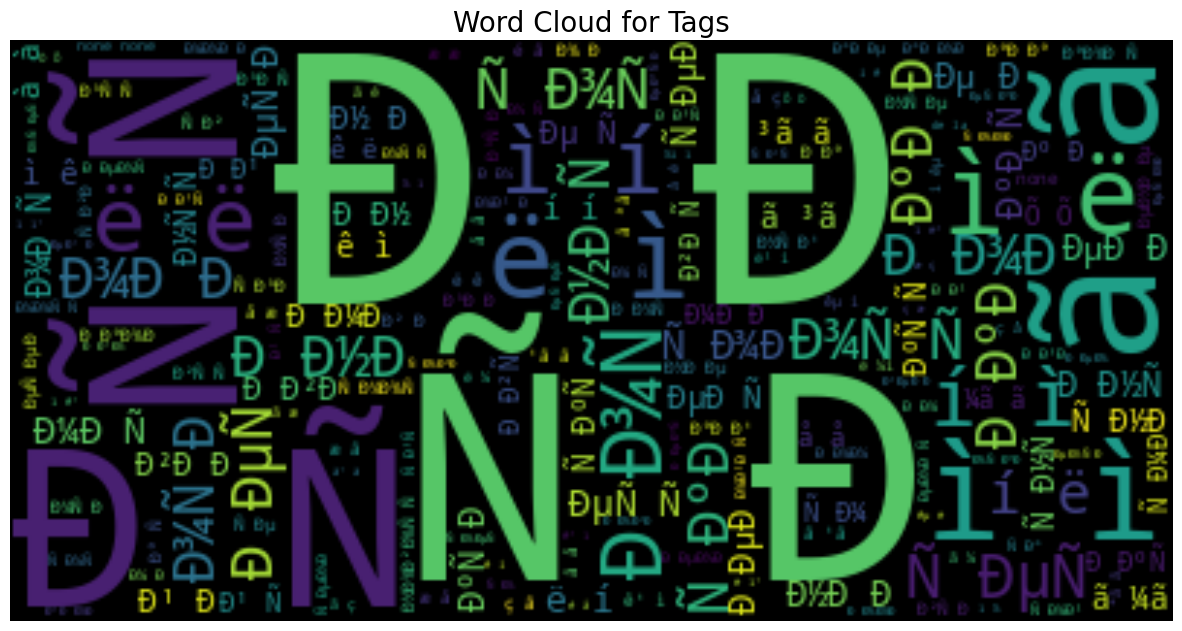

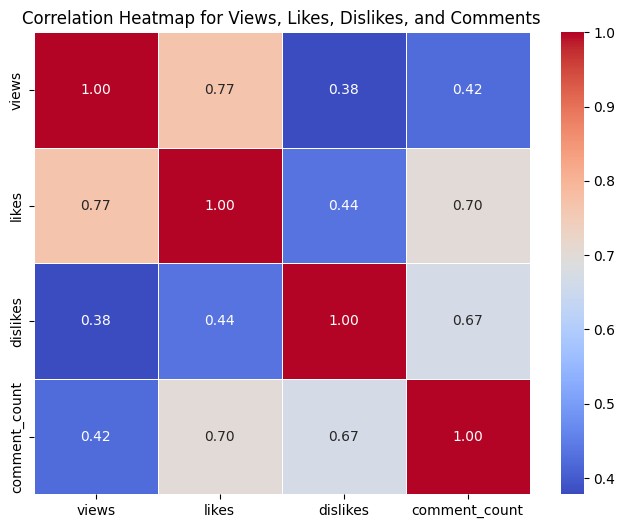

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Generate Word Cloud for 'tags' column
plt.figure(figsize=(15, 15))
stopwords = set(STOPWORDS)

# Convert tags to a single string for word cloud generation, handle missing values
wordcloud_text = ' '.join(combined_df['tags'].dropna())
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=1000,
    max_font_size=120,
    random_state=42
).generate(wordcloud_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Tags', fontsize=20)
plt.axis('off')
plt.show()

# Correlation heatmap for 'views', 'likes', 'dislikes', and 'comment_count'
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()

# Heatmap with annotations for better understanding
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Views, Likes, Dislikes, and Comments')
plt.show()
